In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './../scripts')

In [2]:
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.figure import figaspect
import time

import spat_ring_network as r_network
import spat_snp_network as m_network
import sim_util as su
import ricciardi as ric
import integrate as integ

def imshowbar(ax,A,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(imsh, cax=cax, orientation='vertical')

# Test creating networks

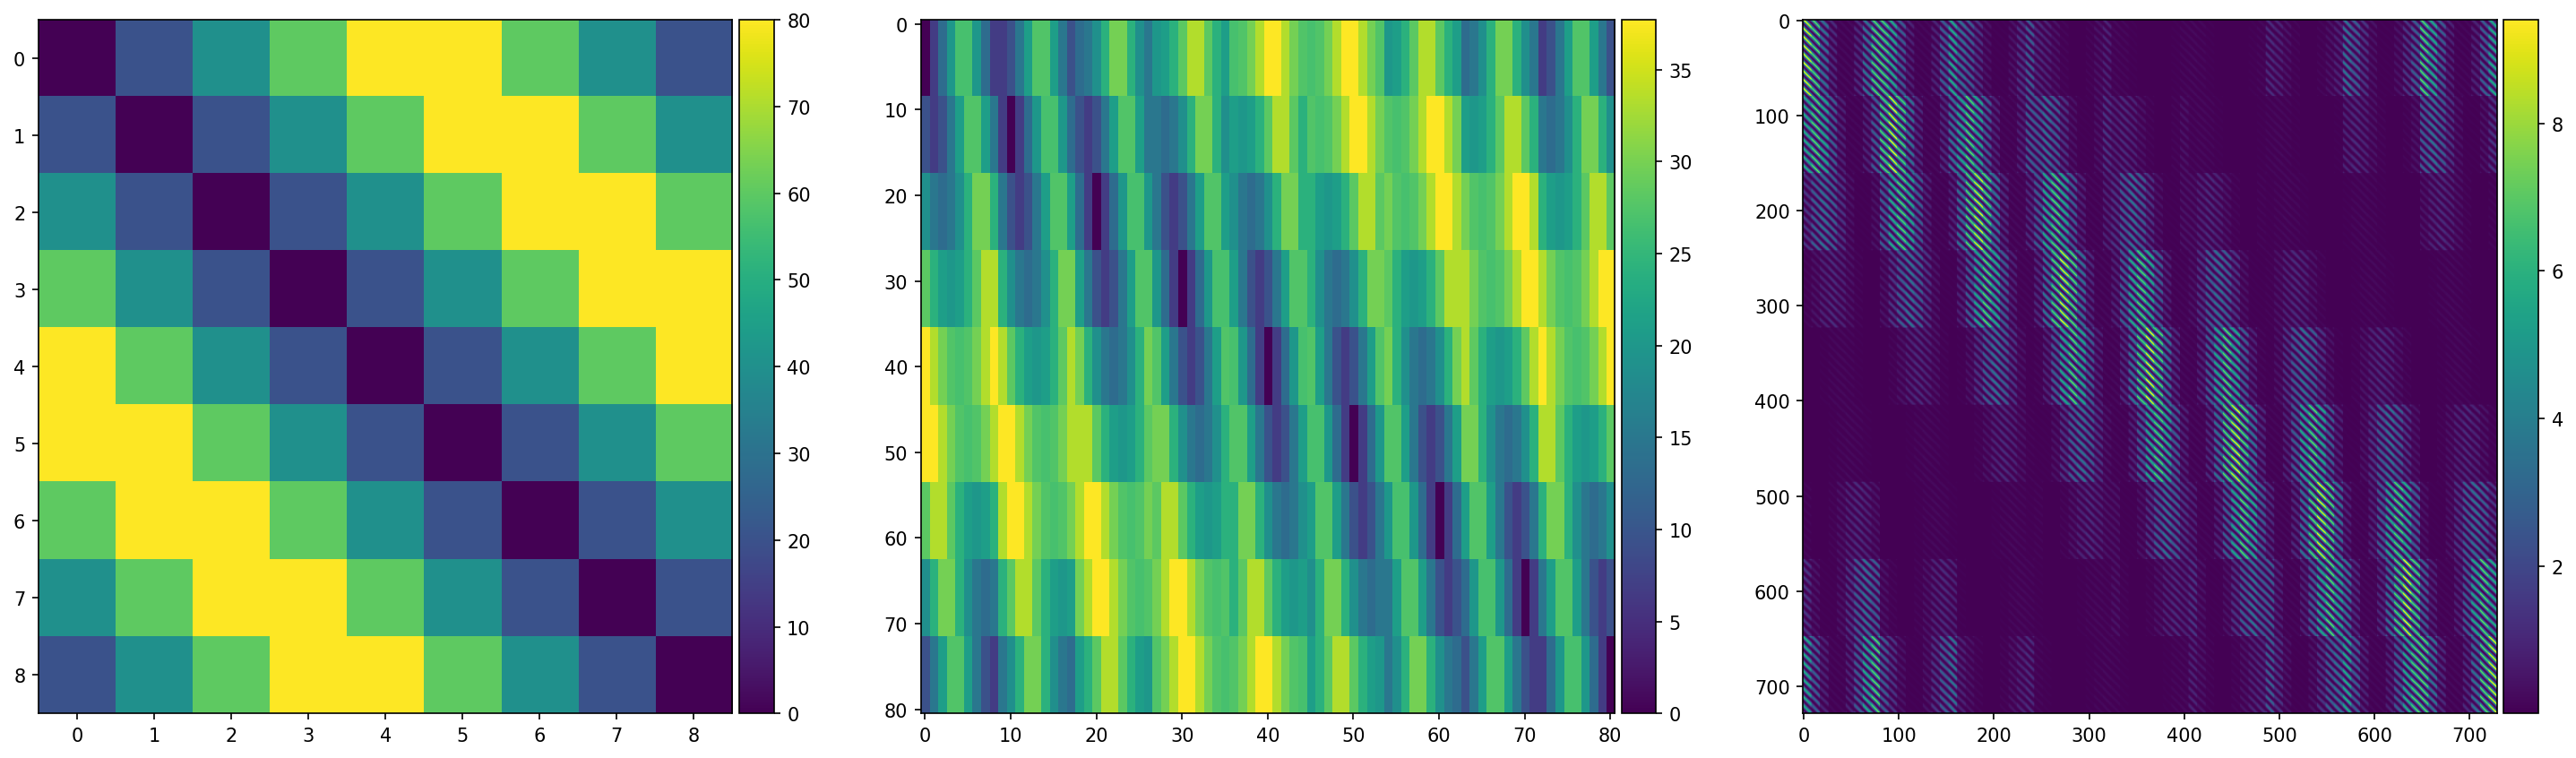

In [24]:
reload(r_network)

net = r_network.network(Nrf=9,Nori=9)

fig,axs = plt.subplots(1,3,figsize=(3*8,8),dpi=150)
imshowbar(axs[0],net.get_ori_diff(True)[:net.Nori,:net.Nori])
imshowbar(axs[1],net.get_rf_diff(True)[::net.Nori,::net.Nori])
imshowbar(axs[2],net.generate_full_kernel(10,30)*500/net.NC[0])

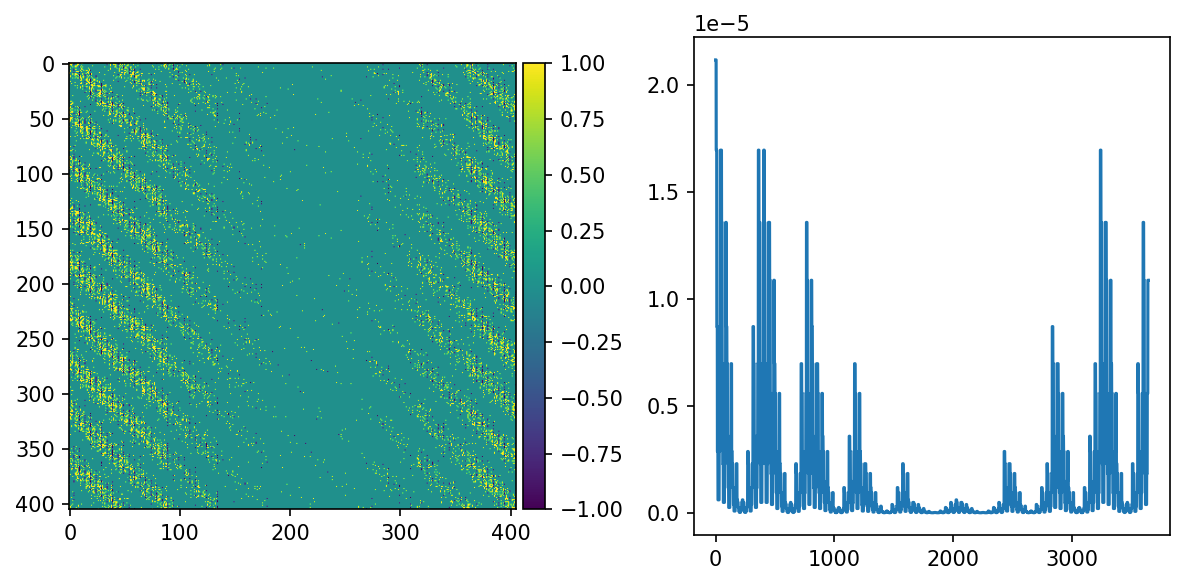

In [46]:
reload(r_network)

net = r_network.network(NC=[4,1],Nrf=9,Nori=9)
net.generate_disorder(np.array([[1,-1],[1,-1]]),10*np.ones((2,2)),30*np.ones((2,2)),
                      np.ones(2),10*np.ones(2),30*np.ones(2),100)

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=150)
imshowbar(axs[0],net.M[:net.NT*net.Nrf**2,:net.NT*net.Nrf**2],cmap='viridis')
axs[1].plot(net.H)

fig.tight_layout()

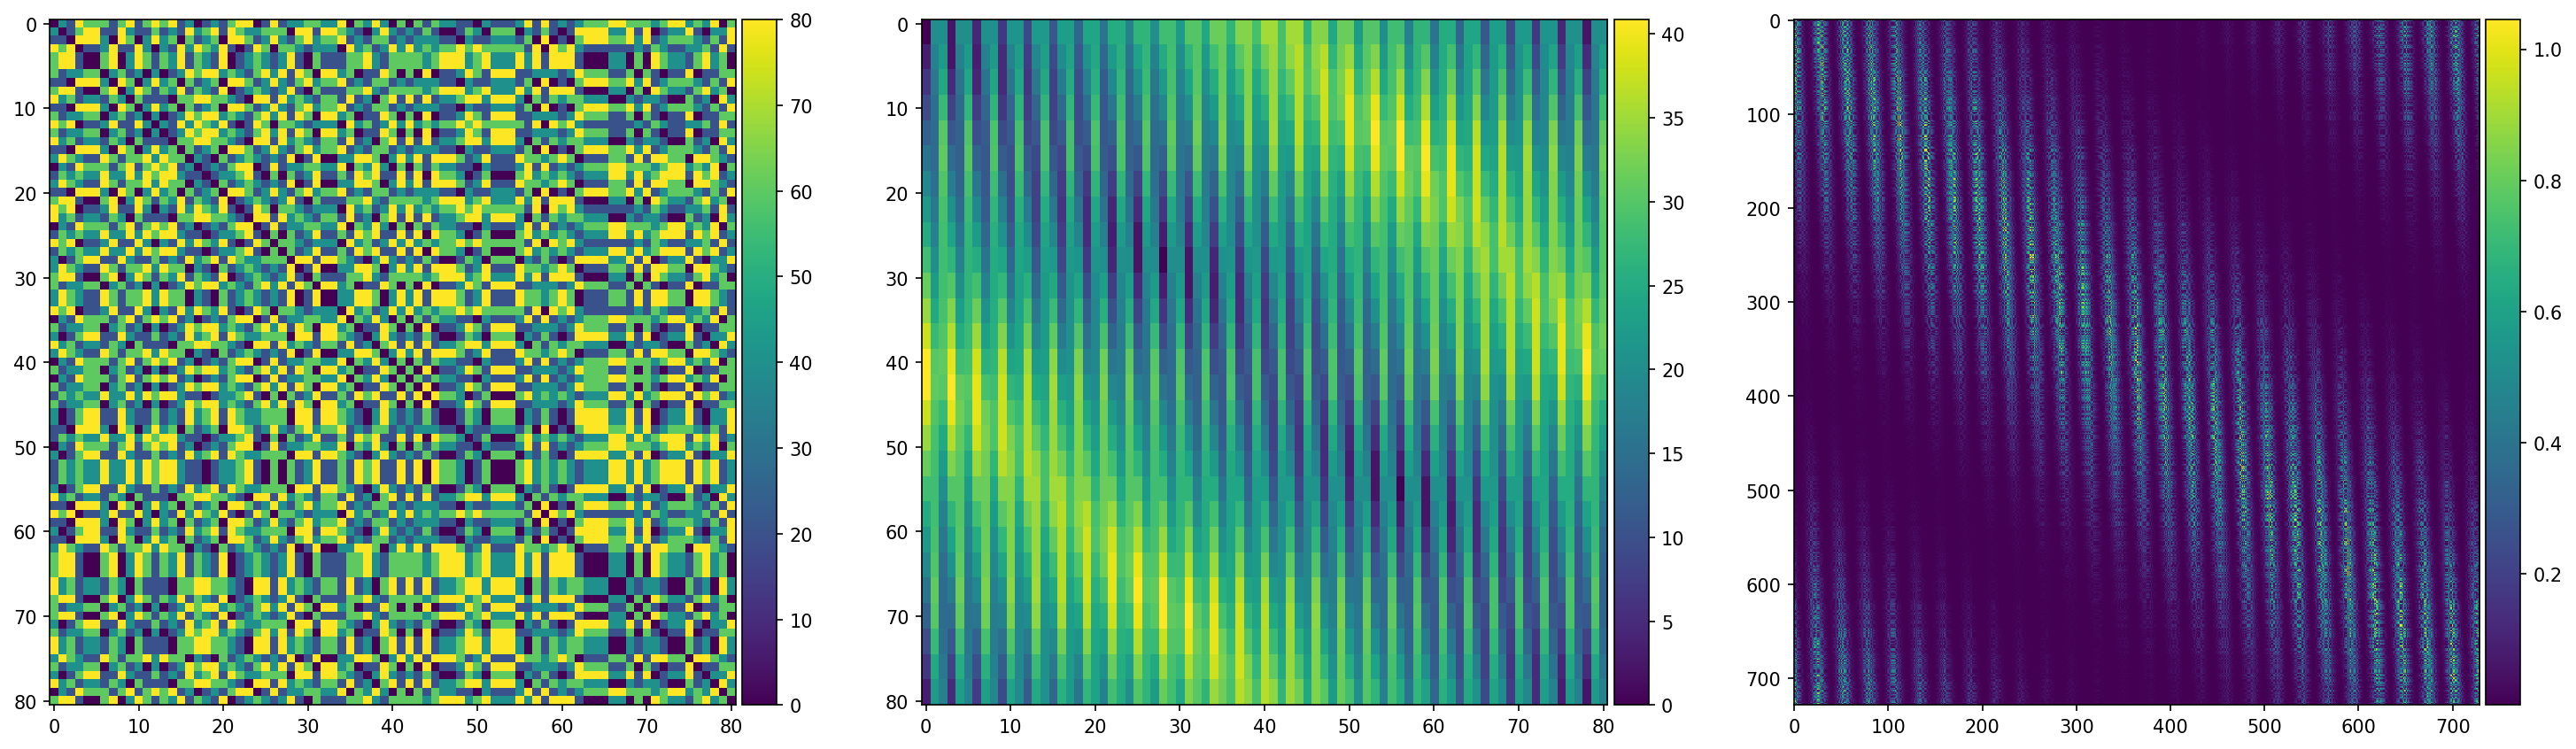

In [30]:
reload(m_network)

net = m_network.network(Nrf=27,Nori=9)

fig,axs = plt.subplots(1,3,figsize=(3*8,8),dpi=150)
imshowbar(axs[0],net.get_ori_diff(True)[::net.Nori,::net.Nori])
imshowbar(axs[1],net.get_rf_diff(True)[::net.Nori,::net.Nori])
imshowbar(axs[2],net.generate_full_kernel(10,30)*500/net.NC[0])

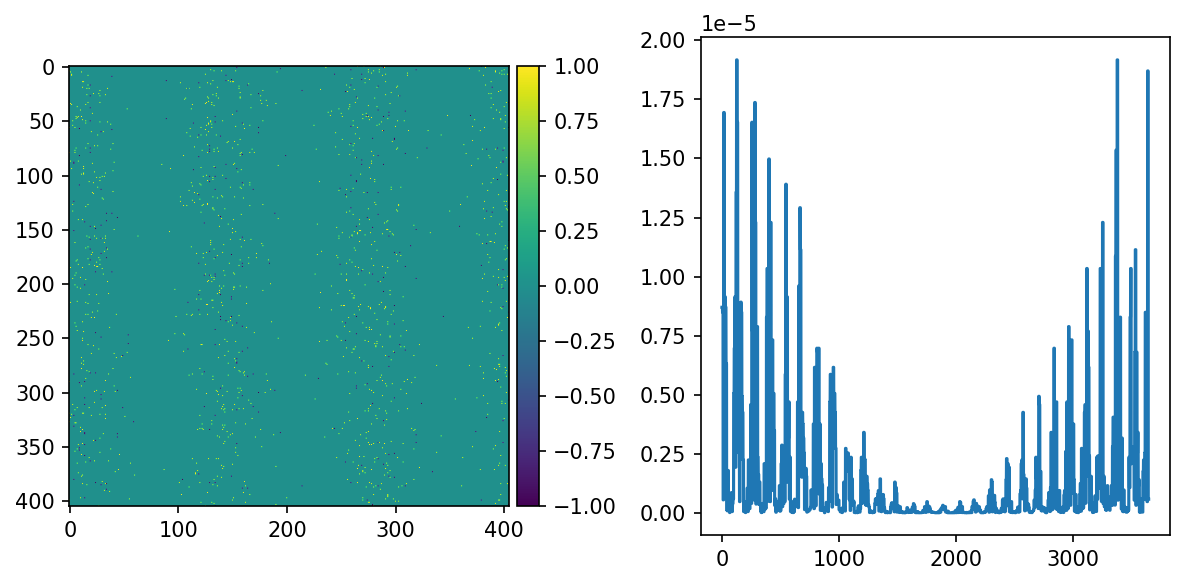

In [50]:
reload(r_network)

net = m_network.network(NC=[4,1],Nrf=27,Nori=9)
net.generate_disorder(np.array([[1,-1],[1,-1]]),10*np.ones((2,2)),30*np.ones((2,2)),
                      np.ones(2),10*np.ones(2),30*np.ones(2),100)

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=150)
imshowbar(axs[0],net.M[:net.NT*net.Nrf**2//9,:net.NT*net.Nrf**2//9],cmap='viridis')
axs[1].plot(net.H)

fig.tight_layout()

# Simulate a map network

In [98]:
reload(r_network)
reload(m_network)

<module 'spat_snp_network' from '/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/spat_snp_network.py'>

In [3]:
ri = ric.Ricciardi()
ri.set_up_nonlinearity('./../scripts/phi_int')

NtE = 100
T = np.linspace(0,NtE*ri.tE,round(NtE*ri.tE/(ri.tI/3))+1)
mask_time = T>(NtE/2*ri.tE)

Loading previously saved nonlinearity


In [223]:
net = m_network.network(NC=[4,1],Nrf=36,Nori=9)
net.generate_disorder(1e-3*np.array([[0.1,-0.8],[0.3,-0.7]]),
                      np.array([[15,10],[15,10]]),np.array([[30,20],[30,20]]),
                      500*1e-3*np.array([0.25,0.25]),
                      20*np.ones(2),40*np.ones(2),500)

In [224]:
sol,_ = integ.sim_dyn(ri,T,0.0,net.M,20*net.H,net.H,net.C_all[0],net.C_all[1],mult_tau=True,max_min=30)

      Integration stopped after 0.21s of simulation time


41.99008600037175
32.28147123658695


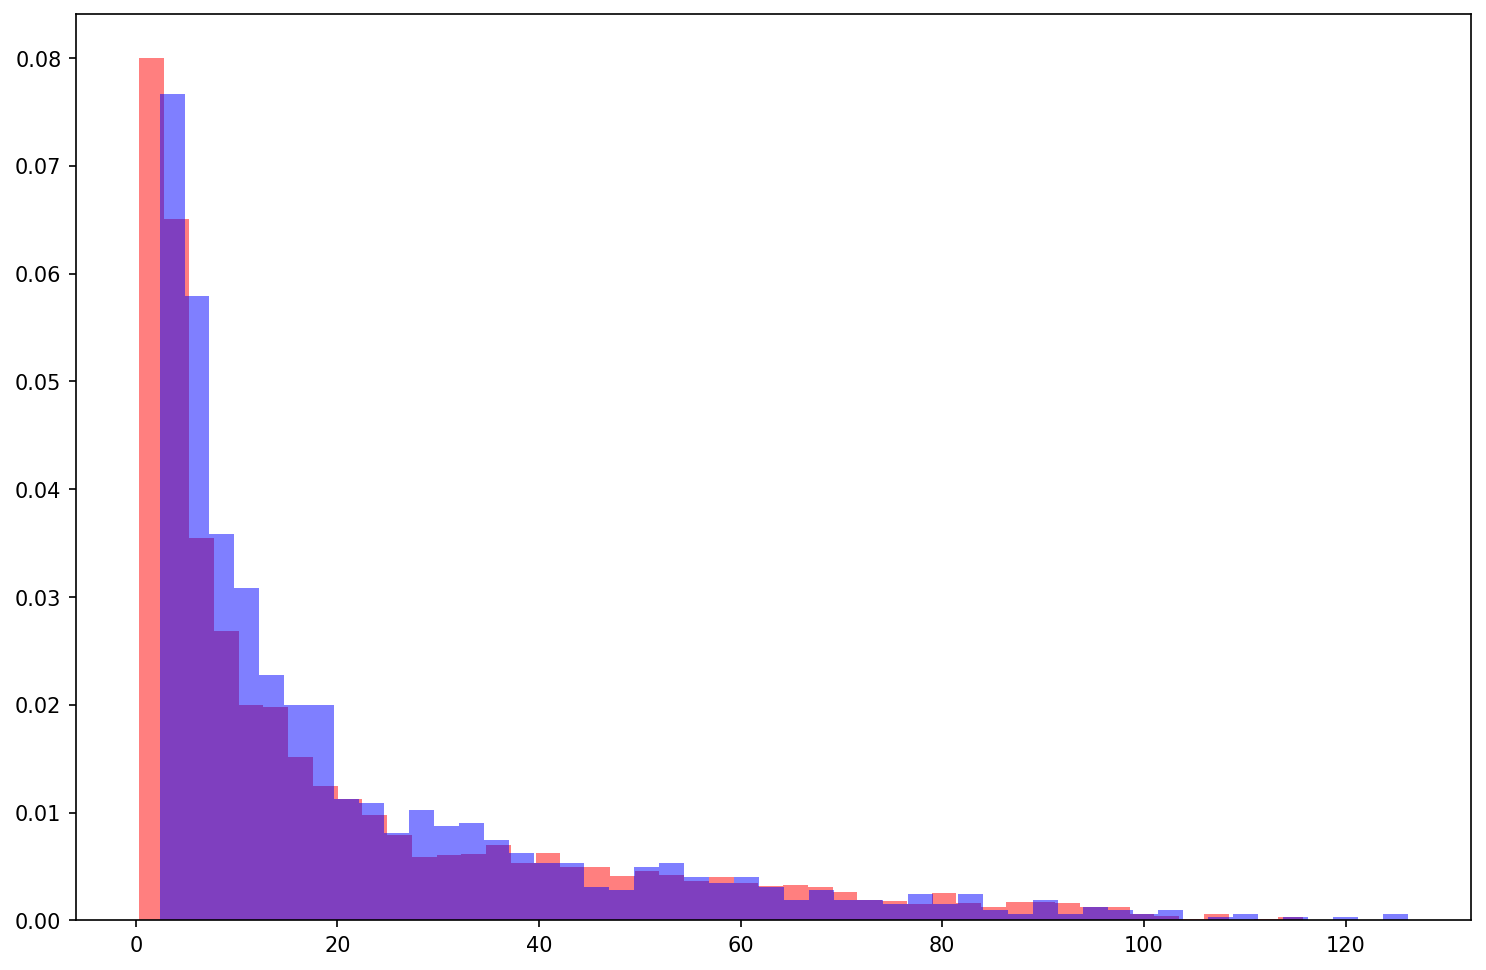

In [225]:
print(np.mean(sol[net.get_centered_neurons(),-1]))
print(np.std(sol[net.get_centered_neurons(),-1]))

fig,ax = plt.subplots(1,1,figsize=(12,8),dpi=150)

ax.hist(sol[net.C_all[0],-1],50,color='r',alpha=0.5,density=True)
ax.hist(sol[net.C_all[1],-1],50,color='b',alpha=0.5,density=True)

plt.show()

## Vary rX and refit to data

In [182]:
eps = np.random.randn((net.N))

In [337]:
rXs = np.arange(1,15+2,2)
eXs = np.arange(0,0.3+0.05,0.05)
bXs = np.arange(0.6,1.0+0.01,0.2)
means = np.zeros((len(rXs),len(eXs),len(bXs)))
stds = np.zeros((len(rXs),len(eXs),len(bXs)))

In [120]:
np.arange(1,15,4)

array([ 1,  5,  9, 13])

In [349]:
for rX_idx,rX in enumerate(rXs):
    for eX_idx,eX in enumerate(eXs):
        for bX_idx,bX in enumerate(bXs):
            this_H = net.H.copy()
            this_H[net.C_all[1]] *= bX
            sol,_ = integ.sim_dyn(ri,T,0.0,net.M,rX*this_H*(1+eX*eps),this_H,net.C_all[0],net.C_all[1],
                                  mult_tau=True,max_min=30)
            means[rX_idx,eX_idx,bX_idx] = np.mean(sol[net.get_centered_neurons(),-1])
            stds[rX_idx,eX_idx,bX_idx] = np.std(sol[net.get_centered_neurons(),-1])

      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after

      Integration stopped after 0.29s of simulation time
      Integration stopped after 0.27s of simulation time
      Integration stopped after 0.22s of simulation time
      Integration stopped after 0.28s of simulation time
      Integration stopped after 0.27s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.28s of simulation time
      Integration stopped after 0.27s of simulation time
      Integration stopped after 0.22s of simulation time
      Integration stopped after 0.28s of simulation time
      Integration stopped after 0.26s of simulation time
      Integration stopped after 0.22s of simulation time
      Integration stopped after 0.28s of simulation time
      Integration stopped after 0.27s of simulation time
      Integration stopped after 0.22s of simulation time
      Integration stopped after 0.28s of simulation time
      Integration stopped after 0.26s of simulation time
      Integration stopped after

In [244]:
data_means = np.array([6.22, 6.72, 7.17, 7.67, 8.,  10.97, 16.7])
data_stds =  np.array([5.79, 6.64, 6.93, 7.15, 7.07, 8.98, 13.6])

data_means_err = np.array([0.83, 0.96, 1.00, 1.03, 1.02, 1.30, 2.00])
data_stds_err =  np.array([0.48, 0.78, 0.96, 0.81, 0.78, 1.08, 2.63])

In [339]:
from scipy.interpolate import RegularGridInterpolator

mean_itp = RegularGridInterpolator((rXs, eXs, bXs), means)
std_itp = RegularGridInterpolator((rXs, eXs, bXs), stds)

In [352]:
from scipy.optimize import least_squares

def fit_best_rXs(eX,bX):
    def residuals(this_rXs):
        pred_means = mean_itp(np.vstack((this_rXs,eX*np.ones(7),bX*np.ones(7))).T)
        pred_stds = std_itp(np.vstack((this_rXs,eX*np.ones(7),bX*np.ones(7))).T)
        res = np.array([(pred_means-data_means)/data_means_err, (pred_stds-data_stds)/data_stds_err])
        return res.ravel()
    xmin,xmax=rXs[0],rXs[-1]
    x0=np.linspace(2,12,7)
    results = least_squares(residuals,x0,bounds=(xmin,xmax))
    return (results.x,mean_itp(np.vstack((results.x,eX*np.ones(7),bX*np.ones(7))).T),
            std_itp(np.vstack((results.x,eX*np.ones(7),bX*np.ones(7))).T),results.cost)

def fit_best():
    def residuals(x):
        _,_,_,cost = fit_best_rXs(x[0],x[1])
        return [cost]
    xmin,xmax=(eXs[0],bXs[0]),(eXs[-1],bXs[-1])
    x0=np.array([0.2,0.6])
    results = least_squares(residuals,x0,bounds=(xmin,xmax))
    return (results.x[0],results.x[1],*fit_best_rXs(results.x[0],results.x[1]))

In [353]:
best_eX,best_bX,best_rXs,best_means,best_stds,best_cost = fit_best()
print(best_eX)
print(best_bX)
print(best_rXs)
print(best_means)
print(best_stds)
print(best_cost)

0.22231953368354027
0.7999999995434984
[5.35307315 5.67268168 5.82204006 6.0042273  6.03689377 7.15968094
 9.53178323]
[ 6.5450638   7.17087588  7.46332826  7.82006148  7.88402433 10.14518973
 15.83923796]
[ 5.68917272  6.36395056  6.67928547  7.06393076  7.13289829  9.54467091
 15.1880825 ]
0.9876481874389142


## Vary contrast and stimulus size

In [50]:
rf_sizes = np.arange(5,40+1,5)
con_rXs = np.array([5.35307315, 5.67268168, 5.82204006, 6.00422730, 6.03689377, 7.15968094, 9.53178323])

In [54]:
reload(m_network)

net = m_network.network(NC=[4,1],Nrf=54,Nori=9,Lrf=90)
netM = net.generate_M(1e-3*np.array([[0.1,-0.8],[0.3,-0.7]]),
                      np.array([[15,10],[15,10]]),np.array([[30,20],[30,20]]),500)
netHs = np.zeros((len(rf_sizes),net.N))
for rf_idx,rf_size in enumerate(rf_sizes):
    netHs[rf_idx] = net.generate_H(500*1e-3*np.array([0.25,0.2]),rf_size*np.ones(2),40*np.ones(2))

In [ ]:
eps = 0.222*np.random.randn((net.N))

In [55]:
rates = np.zeros((len(con_rXs),len(rf_sizes),net.N))

for con_idx,rX in enumerate(con_rXs):
    for rf_idx in range(len(rf_sizes)):
        netH = netHs[rf_idx]
        sol,_ = integ.sim_dyn(ri,T,0.0,netM,rX*netH*(1+eps),netH,net.C_all[0],net.C_all[1],
                              mult_tau=True,max_min=30)
        rates[con_idx,rf_idx] = sol[:,-1]

      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after

## Perform PCA, visualize data

<IPython.core.display.Javascript object>


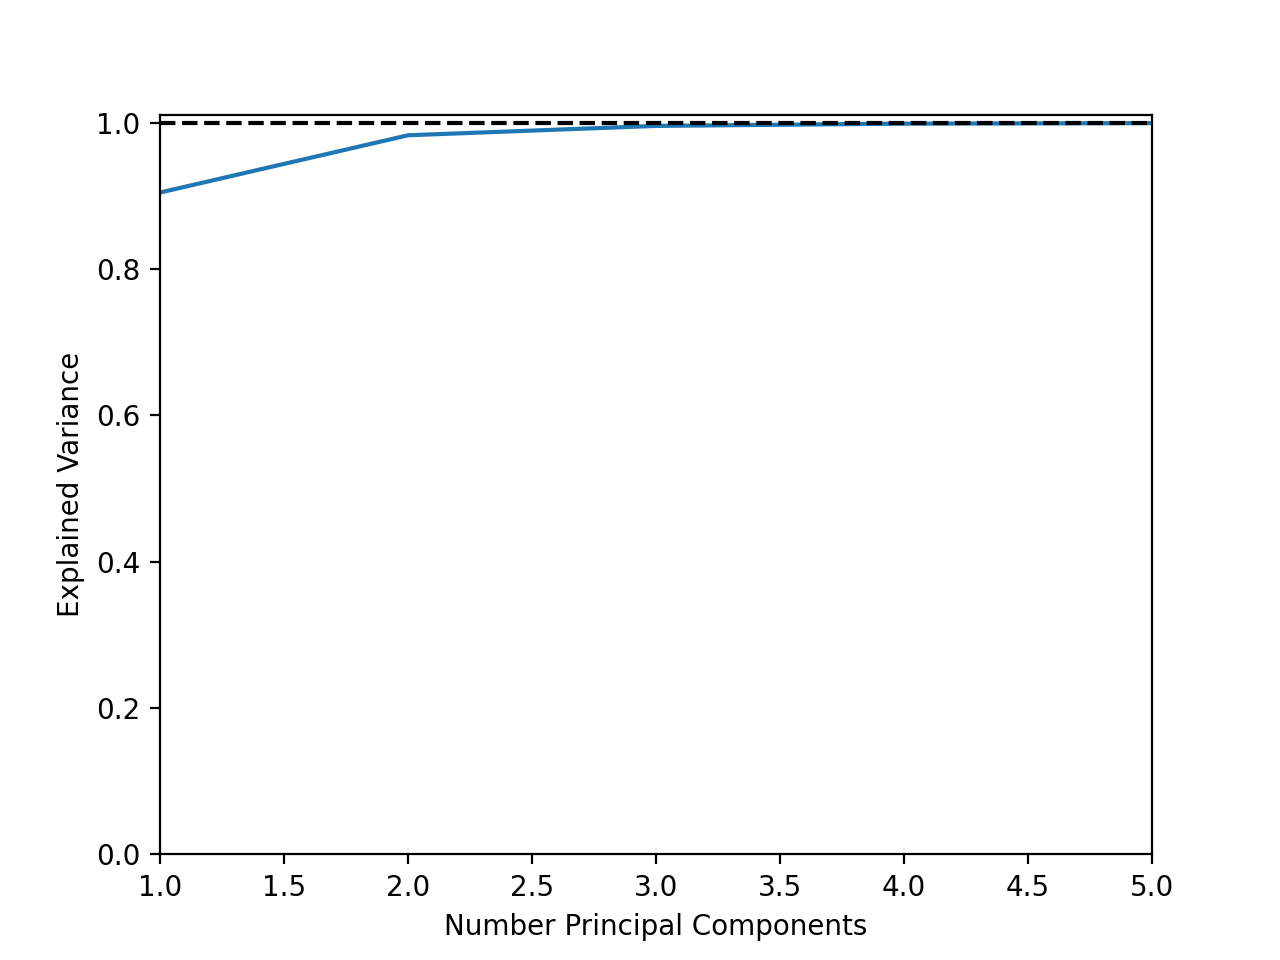

Text(0, 0.5, 'Explained Variance')

In [66]:
from sklearn.decomposition import PCA

X = rates.reshape((-1,net.N))
pca = PCA(n_components=5)
pca.fit(X)

plt.plot(np.arange(1,5+1),np.cumsum(pca.explained_variance_ratio_))
plt.axhline(1,c='k',ls='--')
plt.xlim(1,5)
plt.ylim(0,1.01)
plt.xlabel('Number Principal Components')
plt.ylabel('Explained Variance')

In [67]:
X = rates.reshape((-1,net.N))
pca = PCA(n_components=3)
X_red = pca.fit_transform(X)

rates_red = X_red.reshape((len(con_rXs),len(rf_sizes),3))

In [83]:
np.max(np.abs(pca.components_))

0.1295003222147115

<IPython.core.display.Javascript object>


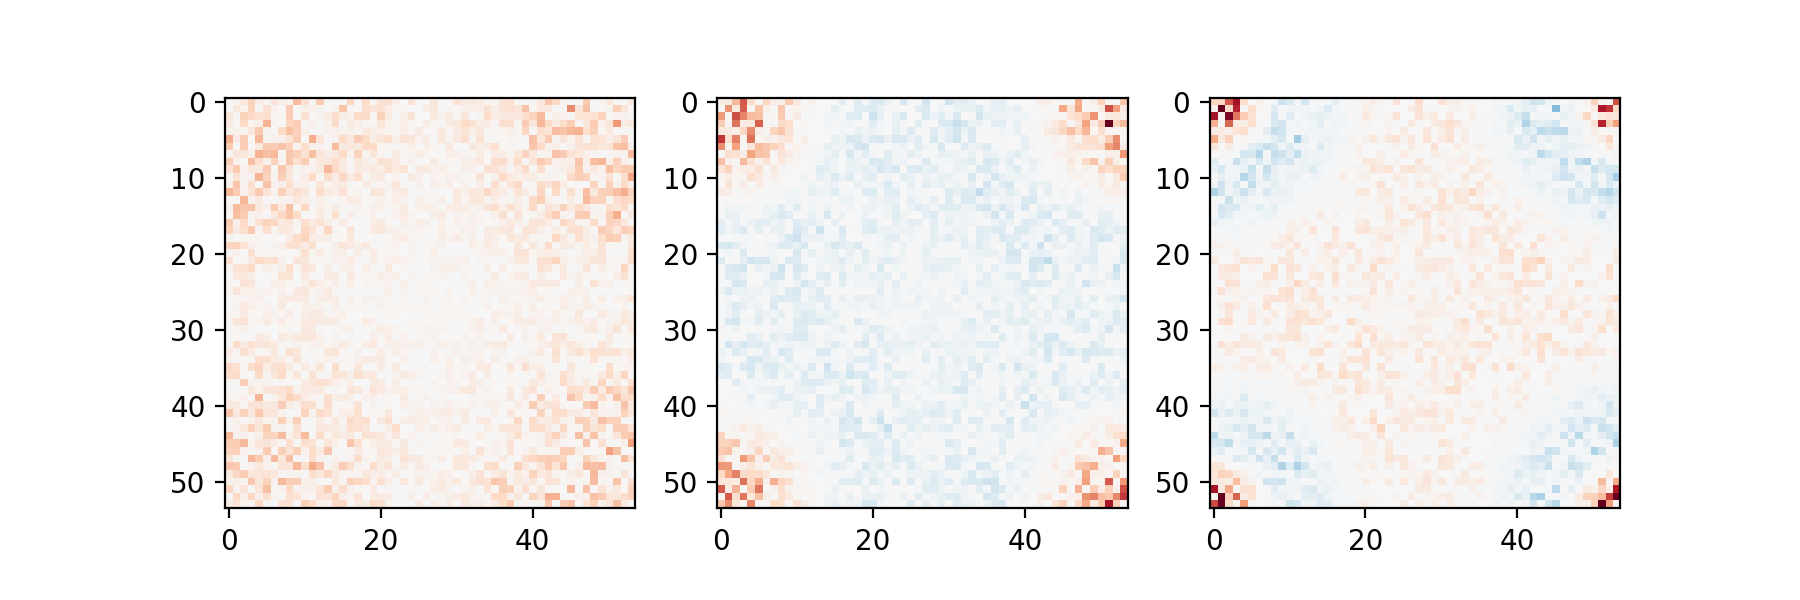

In [100]:
plt.ion()

fig,axs = plt.subplots(1,3,figsize=(9,3))

for i in range(3):
    axs[i].imshow(pca.components_[i].reshape((net.Nrf,net.Nrf,net.NT)).mean(-1),cmap='RdBu_r',vmin=-0.07,vmax=0.07)

In [68]:
# np.savetxt('rates.txt',rates.flatten())
# np.savetxt('rates_reduced.txt',rates_red.flatten())

In [5]:
rates = np.loadtxt('rates.txt').reshape((len(con_rXs),len(rf_sizes),-1))
rates_red = np.loadtxt('rates_reduced.txt').reshape((len(con_rXs),len(rf_sizes),3))

In [25]:
rf_cmap = cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=rf_sizes[0], vmax=rf_sizes[-1]),
                            cmap=plt.get_cmap('cool'))

<IPython.core.display.Javascript object>


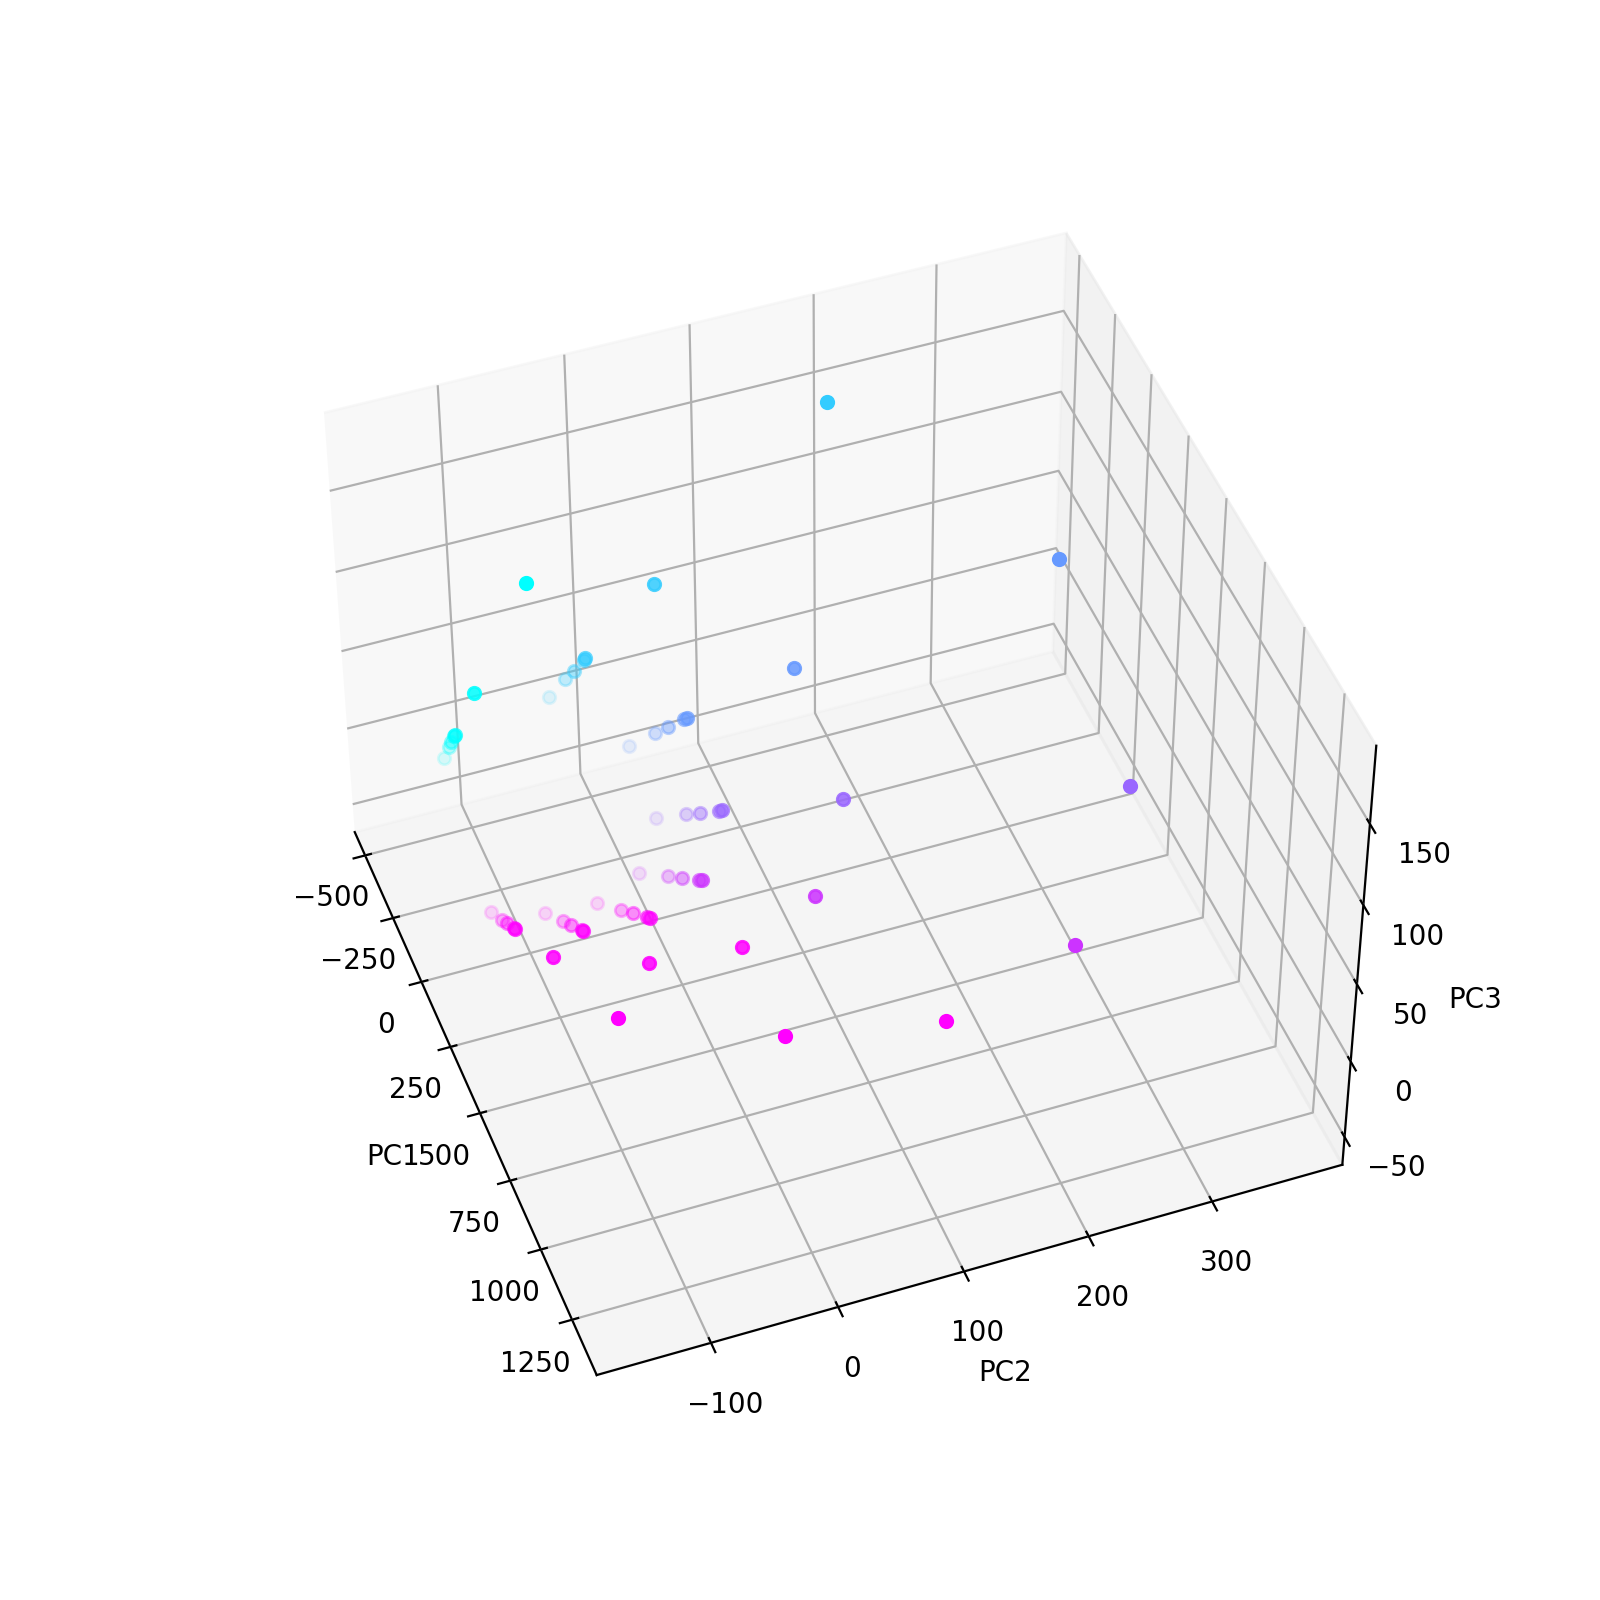

In [92]:
%matplotlib notebook

# from mpl_toolkits.mplot3d import Axes3D

# plt.ion()

fig = plt.figure(figsize=(8,8))
# ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

for con_idx,rX in enumerate(con_rXs):
    alpha = (con_idx+1)/(len(con_rXs))
    for rf_idx,rf_size in enumerate(rf_sizes):
        color = rf_cmap.to_rgba(rf_size)
        this_rates = rates_red[con_idx,rf_idx]
        ax.scatter((this_rates[0]),(this_rates[1]),(this_rates[2]),
                    color=color,alpha=alpha)
        
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
        
# widget = mpl.widgets.AxesWidget(ax)

# ax.view_init()

plt.show()

## Compare to Gaussian with Varied Width, Height

In [91]:
amps = np.arange(10)
widths = np.arange(5,40+1,5)

In [ ]:
vecs = np.

## Vary contrast, stim size, and orientation

In [29]:
con_rXs = np.array([5.35307315, 5.67268168, 5.82204006, 6.00422730, 6.03689377, 7.15968094, 9.53178323])
rf_sizes = np.arange(5,40+1,5)
vis_oris = np.arange(0,180,15)

In [30]:
reload(m_network)

net = m_network.network(NC=[4,1],Nrf=54,Nori=9,Lrf=90)
netM = net.generate_M(1e-3*np.array([[0.1,-0.8],[0.3,-0.7]]),
                      np.array([[15,10],[15,10]]),np.array([[30,20],[30,20]]),500)
netHs = np.zeros((len(rf_sizes),len(vis_oris),net.N))
for rf_idx,rf_size in enumerate(rf_sizes):
    for ori_idx,vis_ori in enumerate(vis_oris):
        netHs[rf_idx,ori_idx] = net.generate_H(500*1e-3*np.array([0.25,0.2]),
                                       rf_size*np.ones(2),40*np.ones(2),vis_ori=vis_ori)

In [31]:
eps = 0.222*np.random.randn((net.N))

In [32]:
rates = np.zeros((len(con_rXs),len(rf_sizes),len(vis_oris),net.N))

for con_idx,rX in enumerate(con_rXs):
    for rf_idx in range(len(rf_sizes)):
        for ori_idx,vis_ori in enumerate(vis_oris):
            netH = netHs[rf_idx,ori_idx]
            sol,_ = integ.sim_dyn(ri,T,0.0,netM,rX*netH*(1+eps),netH,net.C_all[0],net.C_all[1],
                                  mult_tau=True,max_min=30)
            rates[con_idx,rf_idx,ori_idx] = sol[:,-1]

      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after

      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after

      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.26s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.19s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after

      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after

      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after

In [39]:
from sklearn.decomposition import PCA

X = rates.reshape((-1,net.N))
pca = PCA(n_components=7)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.33237042 0.28700074 0.27906879 0.02962852 0.01822078 0.01746644
 0.01084696]


In [40]:
X = rates.reshape((-1,net.N))
pca = PCA(n_components=3)
X_red = pca.fit_transform(X)

rates_red = X_red.reshape((len(con_rXs),len(rf_sizes),len(vis_oris),3))

In [36]:
# np.savetxt('rates_with_ori.txt',rates.flatten())
# np.savetxt('rates_with_ori_reduced.txt',rates_red.flatten())

In [94]:
# rates = np.loadtxt('rates_with_ori.txt').reshape((len(con_rXs),len(rf_sizes),len(vis_oris),-1))
rates_red = np.loadtxt('rates_with_ori_reduced.txt').reshape((len(con_rXs),len(rf_sizes),len(vis_oris),3))

In [95]:
ori_cmap = cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=180),
                            cmap=plt.get_cmap('hsv'))

<IPython.core.display.Javascript object>


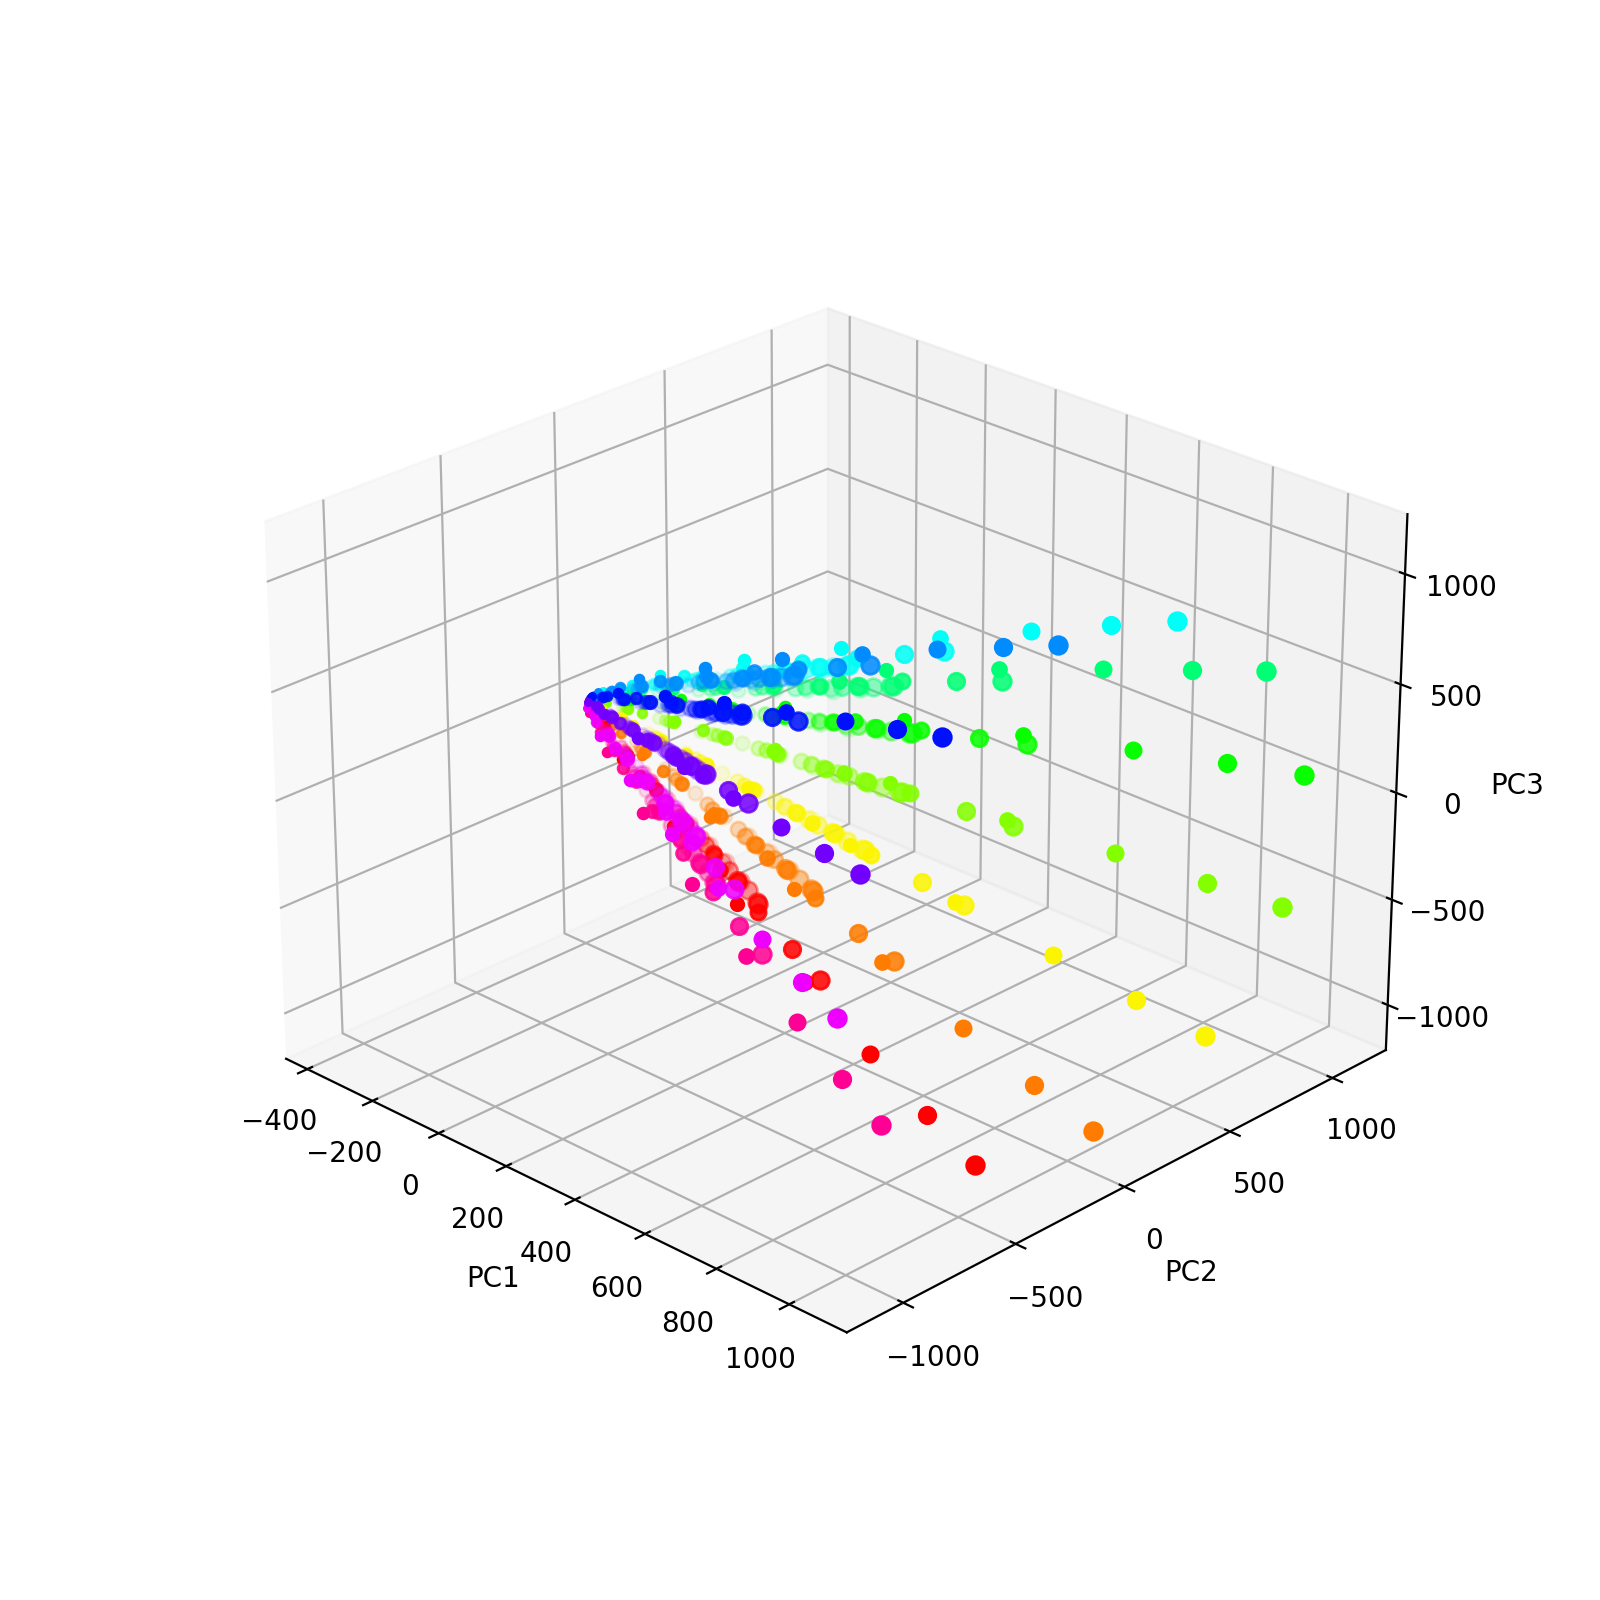

In [96]:
%matplotlib notebook

# from mpl_toolkits.mplot3d import Axes3D

# plt.ion()

fig = plt.figure(figsize=(8,8))
# ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

for con_idx,rX in enumerate(con_rXs):
    alpha = (con_idx+1)/(len(con_rXs))
    for rf_idx,rf_size in enumerate(rf_sizes):
        for ori_idx,vis_ori in enumerate(vis_oris):
            color = ori_cmap.to_rgba(vis_ori)
            this_rates = rates_red[con_idx,rf_idx,ori_idx]
            ax.scatter((this_rates[0]),(this_rates[1]),(this_rates[2]),
                        color=color,alpha=alpha,s=rf_size)
        
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
        
# widget = mpl.widgets.AxesWidget(ax)

# ax.view_init()

plt.show()

<IPython.core.display.Javascript object>


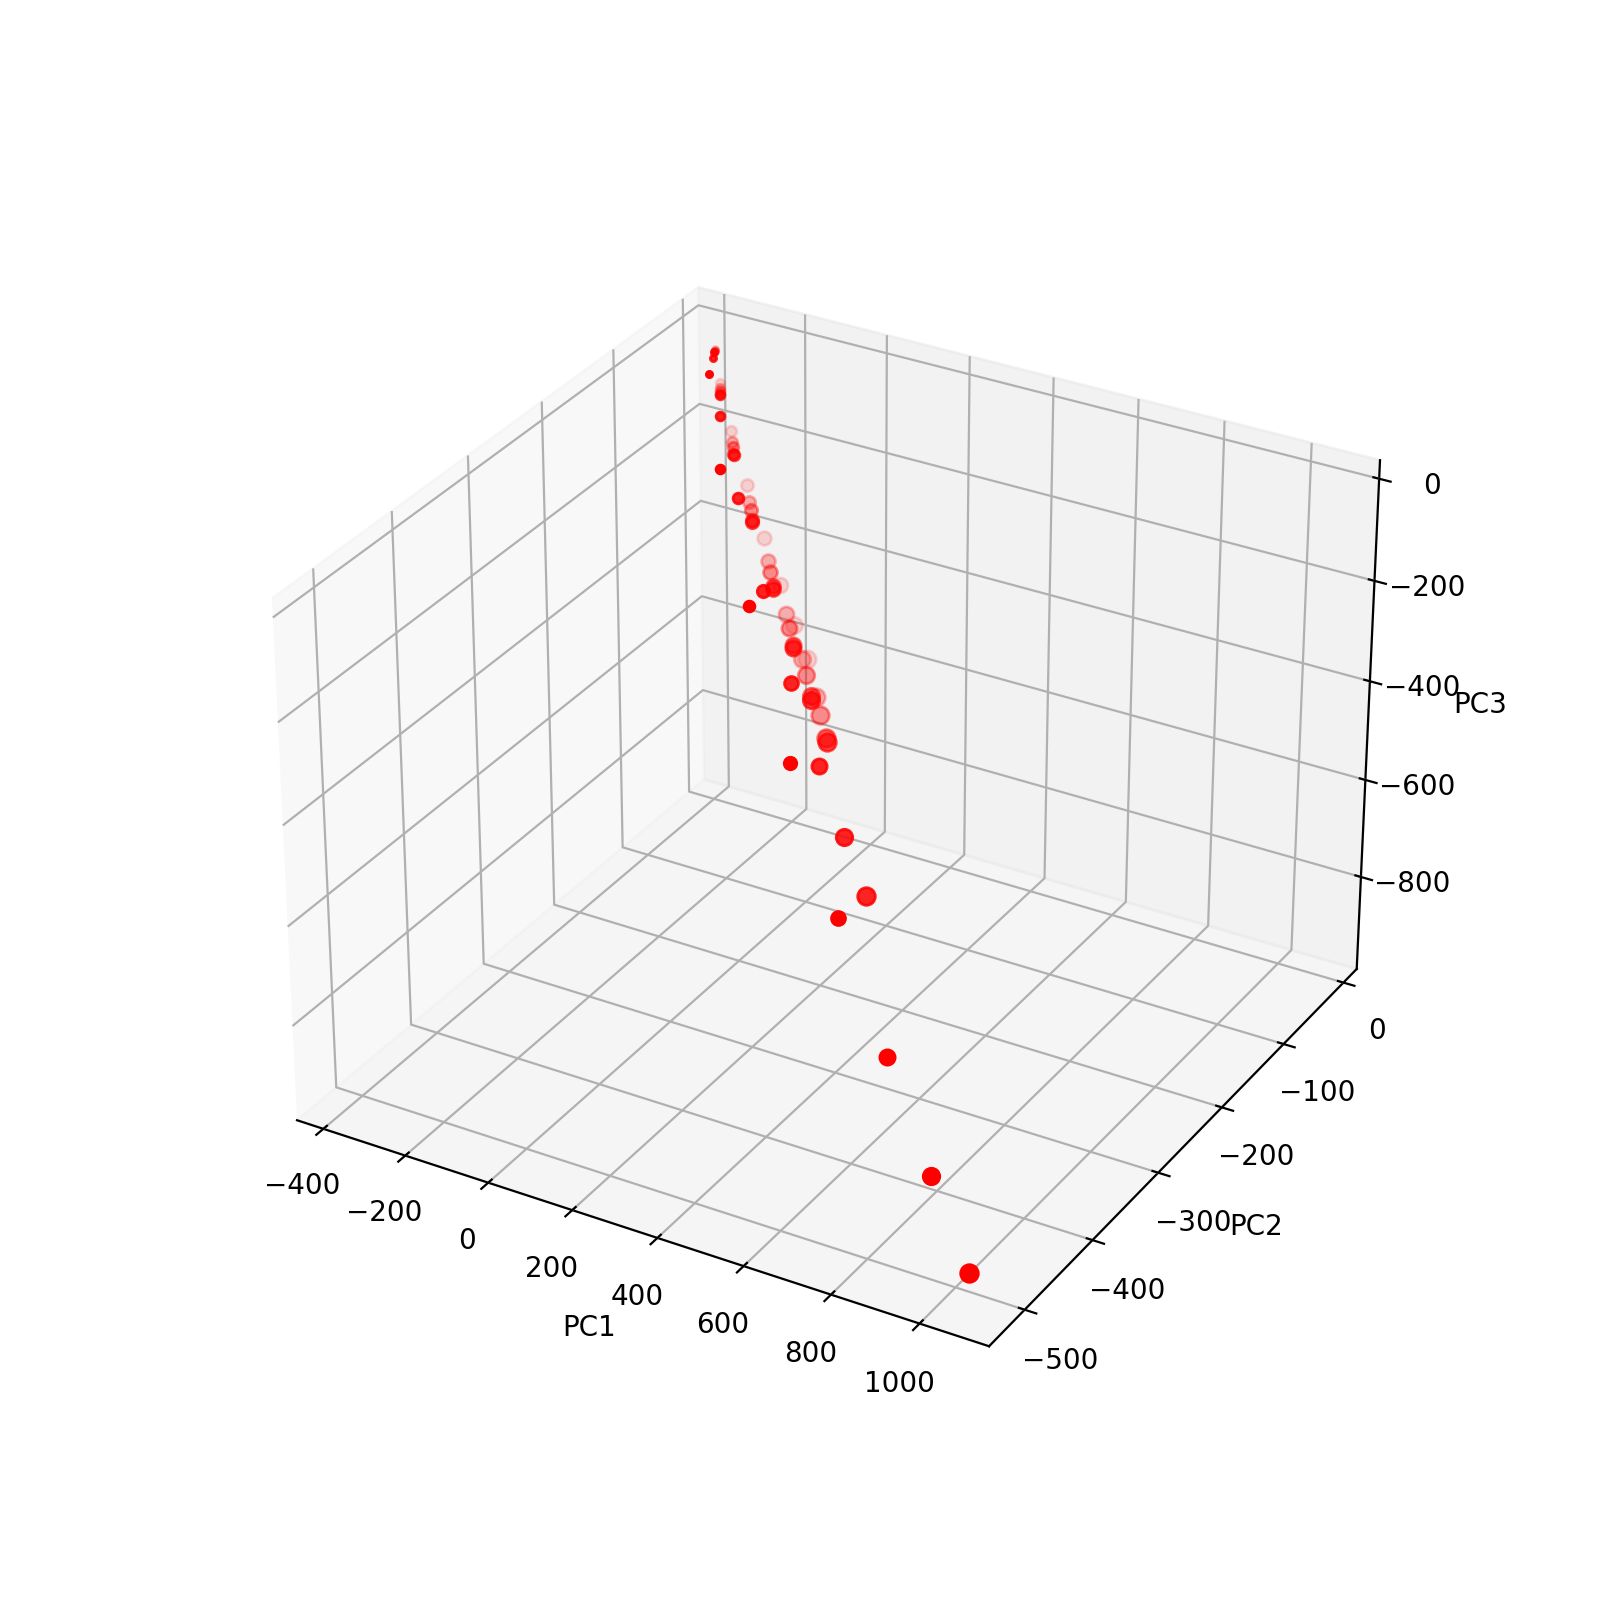

In [101]:
%matplotlib notebook

# from mpl_toolkits.mplot3d import Axes3D

# plt.ion()

fig = plt.figure(figsize=(8,8))
# ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

for con_idx,rX in enumerate(con_rXs):
    alpha = (con_idx+1)/(len(con_rXs))
    for rf_idx,rf_size in enumerate(rf_sizes):
        for ori_idx,vis_ori in enumerate(vis_oris[0:1]):
            color = ori_cmap.to_rgba(vis_ori)
            this_rates = rates_red[con_idx,rf_idx,ori_idx]
            ax.scatter((this_rates[0]),(this_rates[1]),(this_rates[2]),
                        color=color,alpha=alpha,s=rf_size)
        
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
        
# widget = mpl.widgets.AxesWidget(ax)

# ax.view_init()

plt.show()

In [113]:
np.linspace(15,45,4)

array([15., 25., 35., 45.])

In [114]:
np.round(np.linspace(0,1,10))

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])